Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

Some advantages of decision trees are:

Simple to understand and to interpret. Trees can be visualized.

Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Some tree and algorithm combinations support missing values.

The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

Able to handle both numerical and categorical data. However, the scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.

Able to handle multi-output problems.

Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:

Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.

The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

## Library Loading and Data Preparation

In [1]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_text

# Load the Iris dataset

In [2]:
iris = load_iris()
x = iris.data
y = iris.target


# Split the data into training and test sets

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Next, let's initialize the Decision Tree model and train it on the training data.


In [4]:
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

Model Evaluation

In [5]:
y_pred = dt_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Visualize the decision tree structure.

Decision Tree Rules:
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1
|

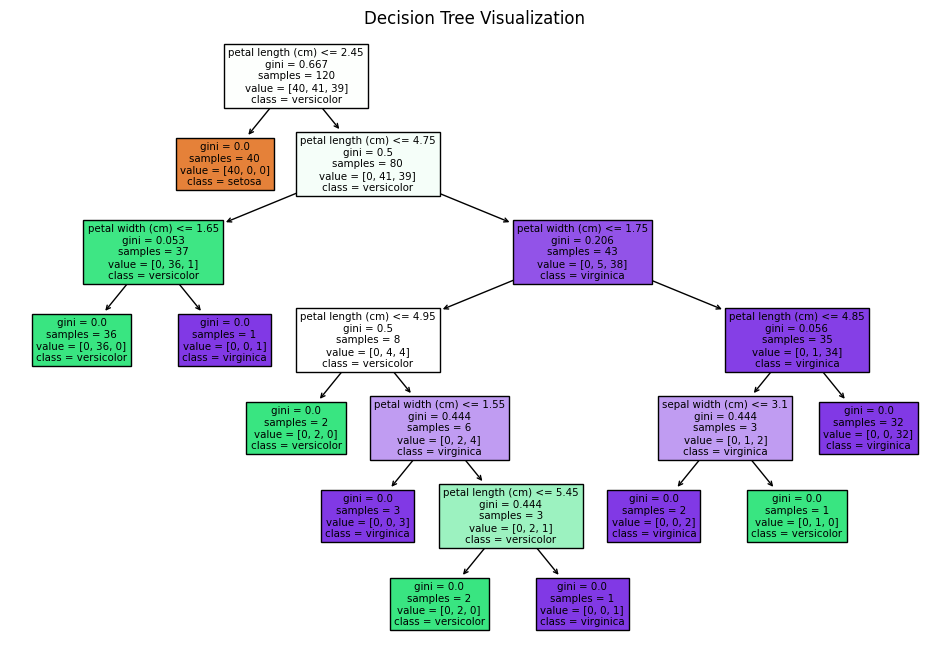

In [6]:
tree_rules = export_text(dt_model, feature_names=iris.feature_names)
print("Decision Tree Rules:\n", tree_rules)

# Visualize the decision tree


plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree Visualization')
plt.show()